In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# OBSERVATION DATA
forcens = pd.read_csv("~/Science/lgm_foram_census/tidy/forcens_sp_r_wsst.csv")
lgm = pd.read_csv("~/Science/lgm_foram_census/tidy/lgm_sp_r_wsst.csv")
lgm = lgm[lgm["Data_Source"]=='margo']

topt = pd.read_csv("../data/Topt_sp_lgm.csv")
species_list = topt.species

/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/pr

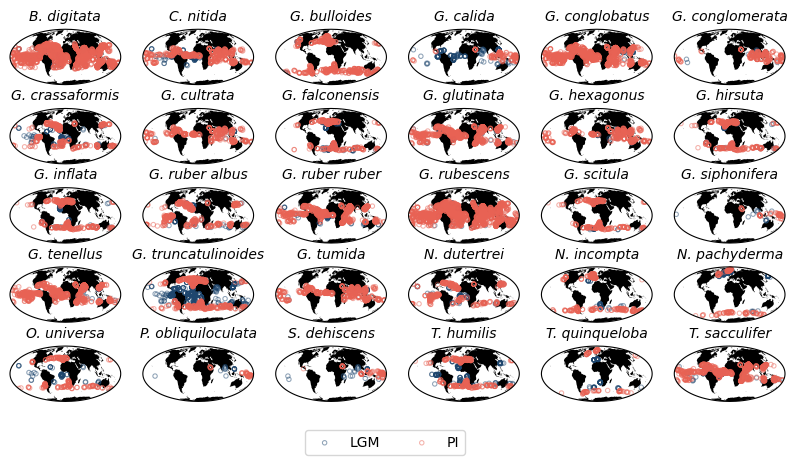

In [3]:
## write a function to filter species
def sp_opt_sub(df, species, age):
    ## select latitudes, longitudes and species columns
    df_sub = df[['Latitude','Longitude',species, "SST"]]
    
    ## get the optimal niche
    opt_niche = topt[topt.species==species]

    ## if LGM
    if age == "LGM":
        Topt_mean = opt_niche.iloc[0,1]
        Topt_sd = opt_niche.iloc[0,3]
    elif age == "PI":
        Topt_mean = opt_niche.iloc[0,2]
        Topt_sd = opt_niche.iloc[0,4]
    else:
        raise ValueError("age must be either lgm or pi")
    
    df_sub = df_sub[(df_sub.SST >= Topt_mean-Topt_sd) & (df_sub.SST <= Topt_mean+Topt_sd)]
        
    return df_sub

## write a function to plot optimal niche, just occurence
def plot_opt_niche(ax, df, species, age, **kwargs):
    ## select latitudes, longitudes and species columns
    df_sub = sp_opt_sub(df, species, age)
    ## plot
    ax.scatter(df_sub.Longitude, df_sub.Latitude,
               #s = df_sub[species],
               s=10,
               facecolors='none',
               transform=ccrs.PlateCarree(), **kwargs)
    return ax

## do this for multiple species
fig, axes = plt.subplots(nrows=6, ncols=6,
                         figsize=(10, 6),
                         subplot_kw=dict(projection=ccrs.Mollweide()))

from cartopy.feature import LAND
for i, ax in enumerate(axes.flat):
    ## add coastlines
    ax.set_global()
    ## add land mask
    ax.add_feature(LAND, facecolor="black")
    ax.set_title(species_list[i], style='italic', fontfamily='sans-serif', fontsize=10)

    plot_opt_niche(ax, lgm, species_list[i], age='LGM', label="LGM",
                   edgecolors="#1e466e", alpha=0.5,
                    linewidth=0.75)
    
    plot_opt_niche(ax, forcens, species_list[i], age='PI', label="PI",
                   edgecolors="#e86254",alpha=0.5,
                    linewidth=0.75)

    ## if exceed the number of species, break
    if i == len(species_list) - 1:
        break

## remove unused axes
for ax in axes.flat[i+1:]:
    ax.remove()

## legend
#fig.legend(["LGM", "PI"], loc="lower center", ncol=1, bbox_to_anchor=(0.58, 0.13))
fig.legend(["LGM", "PI"], loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.15))

## save the fig
fig.savefig("../output/ext_data_fig4.png", dpi=300, bbox_inches='tight')